<a href="https://colab.research.google.com/github/MunhozSilva/TFG/blob/main/TFG_Luciano_e_Miguel_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFG - Churn (Evasão de Clientes)

Objetivo


*   Identificar clientes com risco de evasão
*   Propiciar uma melhor experiência na empresa para reverter a situação



Dataset Churn Modelling (Kaggle)

Importando Dataset do GitHub

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


full = 'https://raw.githubusercontent.com/MunhozSilva/TFG-Churn-Prediction/main/Churn_Modelling.csv'
arquivo = '/content/data-description.xlsx'
df = pd.read_csv(full, encoding = 'unicode_escape', index_col='RowNumber')

geo_codes, geo_values = pd.factorize(df['Geography'])
df['Geography'] = geo_codes
print('Geography values:',geo_values)

sex_code, sex_value = pd.factorize(df['Gender'])
df['Gender'] = sex_code
print('Gender values:',sex_value)

df = df.drop(['CustomerId','Surname'],axis=1)

print('Dataset Original:',df.shape)
display(df.head())

dfExited = df[df['Exited']==1]
dfStay = df[df['Exited']==0]
xExited = len(dfStay)/len(dfExited)
print('Replicar Exited:',xExited)
df = pd.concat([dfStay, dfExited.sample(frac=xExited, replace=True, random_state=42)], ignore_index=True)
del dfExited, dfStay

df = df.sample(frac=1,random_state=42).reset_index(drop=True)
print('Dataset Esxpandido:',df.shape)
display(df.head())

Geography values: Index(['France', 'Spain', 'Germany'], dtype='object')
Gender values: Index(['Female', 'Male'], dtype='object')
Dataset Original: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,1,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,1,0,43,2,125510.82,1,1,1,79084.10,0


Replicar Exited: 3.9091801669121256
Dataset Esxpandido: (15926, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,692,1,1,46,2,0.00,2,1,1,105983.09,0
1,516,0,0,37,8,113143.12,1,0,0,3363.36,0
2,531,1,1,37,1,143407.29,2,0,1,84402.46,0
3,717,0,0,36,2,99472.76,2,1,0,94274.72,1
4,737,2,0,43,1,125537.38,1,1,0,138510.01,1


Saíram 7963
Ficaram 7963


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5596ca1d0>]],
      dtype=object)

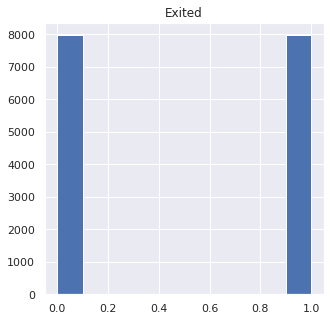

In [ ]:
print('Saíram', len(df[df['Exited'] == 1]))
print('Ficaram', len(df[df['Exited'] == 0]))
plt.rcParams["figure.figsize"] = (5,5)
df.hist('Exited')

## Análises

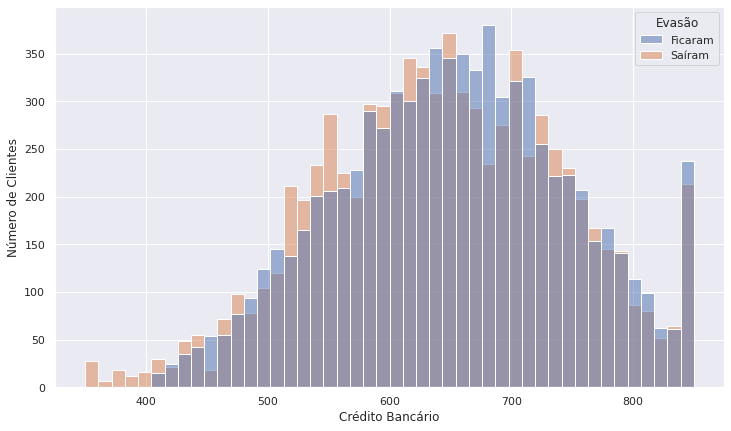

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,7)})

fig, ax1 = plt.subplots()
_ = sns.histplot(df,x='CreditScore',hue='Exited', ax=ax1)
ax1.set_xlabel('Crédito Bancário')
ax1.set_ylabel('Número de Clientes')
legend = ax1.get_legend()
handles = legend.legendHandles
legend.remove()
ax1.legend(handles, ['Ficaram', 'Saíram'], title='Evasão')
plt.show()

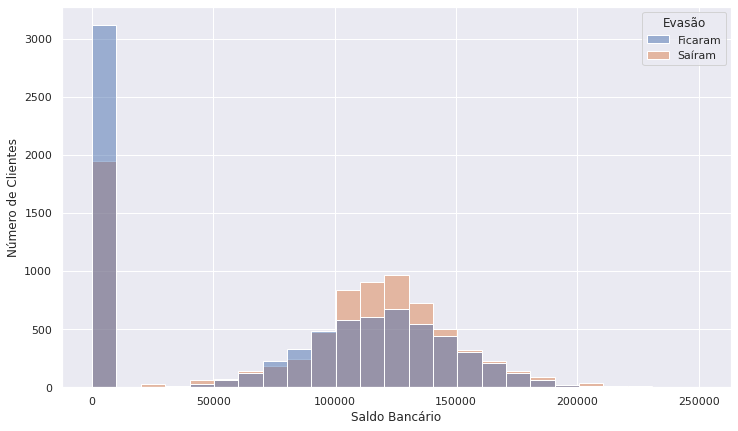

In [ ]:
fig, ax1 = plt.subplots()
_ = sns.histplot(df,x='Balance',hue='Exited')
ax1.set_xlabel('Saldo Bancário')
ax1.set_ylabel('Número de Clientes')
legend = ax1.get_legend()
handles = legend.legendHandles
legend.remove()
ax1.legend(handles, ['Ficaram', 'Saíram'], title='Evasão')
plt.show()

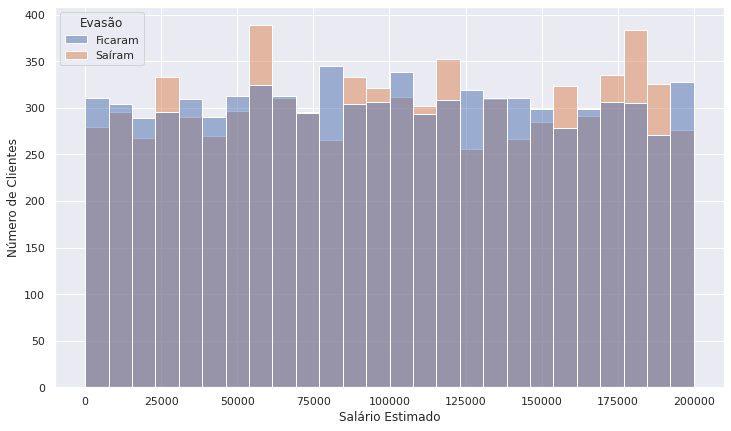

In [ ]:
fig, ax1 = plt.subplots()
_ = sns.histplot(df,x='EstimatedSalary',hue='Exited')
ax1.set_xlabel('Salário Estimado')
ax1.set_ylabel('Número de Clientes')
legend = ax1.get_legend()
handles = legend.legendHandles
legend.remove()
ax1.legend(handles, ['Ficaram', 'Saíram'], title='Evasão')
plt.show()

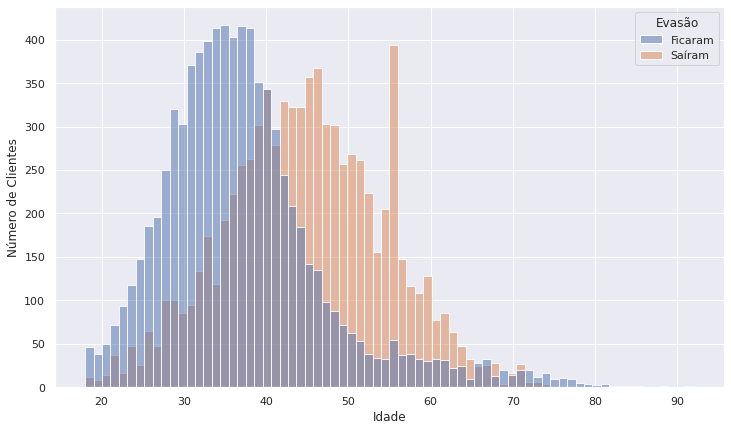

In [ ]:
fig, ax1 = plt.subplots()
_ = sns.histplot(df,x='Age',hue='Exited')
ax1.set_xlabel('Idade')
ax1.set_ylabel('Número de Clientes')
legend = ax1.get_legend()
handles = legend.legendHandles
legend.remove()
ax1.legend(handles, ['Ficaram', 'Saíram'], title='Evasão')
plt.show()

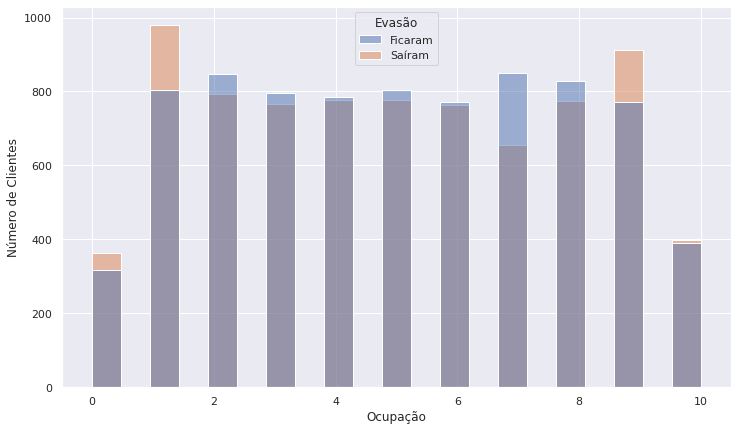

In [ ]:
fig, ax1 = plt.subplots()
_ = sns.histplot(df,x='Tenure',hue='Exited')
ax1.set_xlabel('Ocupação')
ax1.set_ylabel('Número de Clientes')
legend = ax1.get_legend()
handles = legend.legendHandles
legend.remove()
ax1.legend(handles, ['Ficaram', 'Saíram'], title='Evasão')
plt.show()

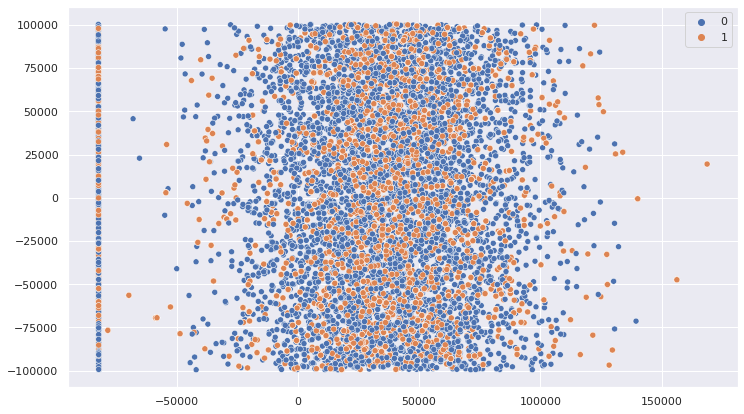

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# atributos de entrada (X) e tutor (y)
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

pca = PCA(n_components=2)
Xpca = pca.fit_transform(X)

sns.scatterplot(x=Xpca[:,0],y=Xpca[:,1],hue=y)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


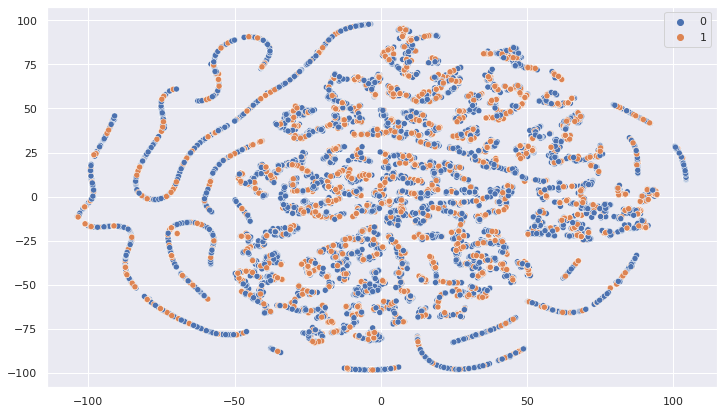

In [ ]:
pca = TSNE(n_components=2)
Xpca = pca.fit_transform(X)

sns.scatterplot(x=Xpca[:,0],y=Xpca[:,1],hue=y)

# Preprocessamento

In [2]:
# atributos de entrada (X) e tutor (y)
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values   #.replace([0,1],[1,0]).values

In [3]:
from sklearn.preprocessing import Normalizer
X = Normalizer().fit_transform(X)

In [4]:
from sklearn.preprocessing import RobustScaler
X = RobustScaler().fit_transform(X)

# Aprendizado de Máquina

In [23]:
# bibliotecas de aprendizado de máquina
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
# biblioteca para análise de modelos
from sklearn.model_selection import KFold
# técnicas de avaliação
from sklearn.metrics import confusion_matrix, classification_report
# biblioteca para salvar os modelos treinados
from joblib import dump, load
# biblioteca para monitorar o tempo de execução de cada técnica
import time

# objetos de aprendizado de máquina
tecnicas = [
  PassiveAggressiveClassifier(random_state=42),
  RidgeClassifier(random_state=42),
  KNeighborsClassifier(),
  DecisionTreeClassifier(max_depth=6,random_state=42),
  RandomForestClassifier(max_depth=6,random_state=42),
  #MLPClassifier(hidden_layer_sizes=(500,),random_state=42, max_iter=1000),
  #SVC(random_state=42),
]

# avaliação de modelos com 5-Fold (quebra o dataset (X,y) em 5 partes)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Executando as técnicas
for clf in tecnicas:
  start = time.time()
  y_pred = []
  y_true = []
  # bloco de X e y para treinamento 
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train,y_train)

    y_pred.extend(clf.predict(X_test))
    y_true.extend(y_test)

  end = time.time()

  print(f'----{clf.__class__.__name__}-------')
  dump(clf, f'{clf.__class__.__name__}.joblib') 

  print(classification_report(
      y_true,
      y_pred,
      target_names=['stay','exited'],
      ))
  print(confusion_matrix(
      y_true,
      y_pred,
      normalize='true',
      ))
  print("Tempo de execução:", round(end - start, 5), "segundos")

----PassiveAggressiveClassifier-------
              precision    recall  f1-score   support

        stay       0.57      0.74      0.64      7963
      exited       0.62      0.43      0.51      7963

    accuracy                           0.59     15926
   macro avg       0.59      0.59      0.58     15926
weighted avg       0.59      0.59      0.58     15926

[[0.73678262 0.26321738]
 [0.5661183  0.4338817 ]]
Tempo de execução: 0.16565 segundos
----RidgeClassifier-------
              precision    recall  f1-score   support

        stay       0.61      0.41      0.49      7963
      exited       0.56      0.74      0.63      7963

    accuracy                           0.57     15926
   macro avg       0.58      0.57      0.56     15926
weighted avg       0.58      0.57      0.56     15926

[[0.40688183 0.59311817]
 [0.25932438 0.74067562]]
Tempo de execução: 0.09498 segundos
----KNeighborsClassifier-------
              precision    recall  f1-score   support

        stay       

Utilizando modelo treinando e salvo para realizar testes.

In [ ]:
clf = load('/content/RandomForestClassifier.joblib') 
y_pred = clf.predict(X)
clf.score(X,y)

0.791446837564397

## Treinamento com Deep Learning

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout, Flatten

classifier = Sequential()
classifier.add(Dense(256, kernel_initializer = 'he_uniform', activation='relu', input_dim = len(df.columns)-1))
classifier.add(Dropout(0.1))
classifier.add(Dense(128, kernel_initializer = 'he_uniform', activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

#classifier.add(Flatten(input_dim=len(df.columns)-1))
#classifier.add(Dense(500, activation='relu'))
#classifier.add(Dense(128, activation='relu'))
#classifier.add(Dense(1, activation='softmax'))


classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
model_history = classifier.fit(X, y, validation_split=0.15, batch_size = 32, epochs = 20)
end = time.time()

Epoch 1/20
424/424 [==============================] - 2s 3ms/step - loss: 0.8299 - accuracy: 0.6956 - val_loss: 1.0278 - val_accuracy: 0.7015
Epoch 2/20
424/424 [==============================] - 1s 3ms/step - loss: 0.6977 - accuracy: 0.7241 - val_loss: 0.6148 - val_accuracy: 0.7555
Epoch 3/20
424/424 [==============================] - 1s 3ms/step - loss: 0.6188 - accuracy: 0.7455 - val_loss: 0.6275 - val_accuracy: 0.7355
Epoch 4/20
424/424 [==============================] - 1s 3ms/step - loss: 0.5484 - accuracy: 0.7508 - val_loss: 0.4858 - val_accuracy: 0.7681
Epoch 5/20
424/424 [==============================] - 1s 3ms/step - loss: 0.5196 - accuracy: 0.7635 - val_loss: 0.5920 - val_accuracy: 0.7639
Epoch 6/20
424/424 [==============================] - 1s 3ms/step - loss: 0.5213 - accuracy: 0.7576 - val_loss: 0.4884 - val_accuracy: 0.7710
Epoch 7/20
424/424 [==============================] - 1s 3ms/step - loss: 0.5172 - accuracy: 0.7595 - val_loss: 0.4906 - val_accuracy: 0.7656
Epoch 

In [22]:
y_true = y
y_pred = [int(round(yn,0)) for yn in classifier.predict(X)[:,0]]


print(classification_report(
    y_true,
    y_pred,
    ))
print(confusion_matrix(
    y_true,
    y_pred,
    normalize='true',
    ))
print("Tempo de execução:", round(end - start, 5), "segundos")

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      7963
           1       0.80      0.84      0.82      7963

    accuracy                           0.82     15926
   macro avg       0.82      0.82      0.82     15926
weighted avg       0.82      0.82      0.82     15926

[[0.79304282 0.20695718]
 [0.15572021 0.84427979]]
Tempo de execução: 24.33526 segundos


Salvando rede deep learning

In [ ]:
classifier.save('DeepLearning.h5')

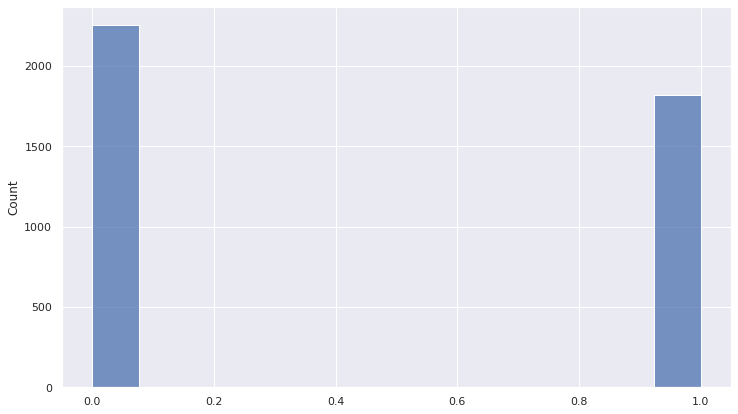

In [ ]:
sns.histplot(y_pred)

In [ ]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

## GridSearchCV

### GridSearch do RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV
# desativa avisos de execução
import warnings
warnings.filterwarnings("ignore")

# lista de parâmetros viáveis de ajuste buscado na técnica
parametros = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10],
    'min_samples_split': [1.5, 2, 2.5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'class_weight': ['balanced', "balanced_subsample"],
}

# técnica a ser ajustada
tec1 = RandomForestClassifier(random_state=42)
# busca de parâmetros para um 5-Fold e métrica de pontuação 'Recall'
busca = GridSearchCV(tec1, parametros, cv=5, scoring='recall_micro')
# buscando no treinamento
start = time.time()
busca.fit(X,y)
end = time.time()
# 5 melhores resultados
pd.DataFrame(data=busca.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_class_weight,param_criterion,param_max_depth,param_max_features,param_min_samples_split,...,param_oob_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
327,7.011311,0.139952,0.129308,0.003053,False,balanced_subsample,gini,10,log2,2,...,False,"{'bootstrap': False, 'class_weight': 'balanced...",0.886692,0.885086,0.877551,0.879435,0.883203,0.882393,0.003423,1
231,7.058023,0.276533,0.130252,0.001274,False,balanced,gini,10,log2,2,...,False,"{'bootstrap': False, 'class_weight': 'balanced...",0.886692,0.885086,0.877551,0.879435,0.883203,0.882393,0.003423,1
303,6.891949,0.049091,0.126320,0.002658,False,balanced_subsample,gini,10,sqrt,2,...,False,"{'bootstrap': False, 'class_weight': 'balanced...",0.886692,0.885086,0.877551,0.879435,0.883203,0.882393,0.003423,1
207,6.964176,0.066994,0.128757,0.007361,False,balanced,gini,10,sqrt,2,...,False,"{'bootstrap': False, 'class_weight': 'balanced...",0.886692,0.885086,0.877551,0.879435,0.883203,0.882393,0.003423,1
301,5.242938,0.060872,0.095509,0.003062,False,balanced_subsample,gini,10,sqrt,2,...,False,"{'bootstrap': False, 'class_weight': 'balanced...",0.889831,0.882889,0.876295,0.881633,0.880691,0.882268,0.004385,5


In [ ]:
print('Melhores parâmetros:')
print('  ',busca.best_estimator_,'\n')
print('Relatório de Classificação:')
y_pred = busca.best_estimator_.predict(X)
print(classification_report(y,y_pred),'\n')
print('Matriz de Confusão:')
print(confusion_matrix(y,y_pred))
print("Tempo de execução:", round(end - start, 5), "segundos")

Melhores parâmetros:
   RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,
                       max_features='sqrt', n_estimators=200, random_state=42) 

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7963
           1       0.92      0.94      0.93      7963

    accuracy                           0.93     15926
   macro avg       0.93      0.93      0.93     15926
weighted avg       0.93      0.93      0.93     15926
 

Matriz de Confusão:
[[7352  611]
 [ 504 7459]]


### GridSearch do DecisionTree

In [39]:
from sklearn.model_selection import GridSearchCV
# desativa avisos de execução
import warnings
warnings.filterwarnings("ignore")

# lista de parâmetros viáveis de ajuste buscado na técnica
parametros = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [10],
    'min_samples_split': [1.5, 2, 2.5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'none'],
}

# técnica a ser ajustada
tec1 = DecisionTreeClassifier(random_state=42)
# busca de parâmetros para um 5-Fold e métrica de pontuação 'Recall'
busca = GridSearchCV(tec1, parametros, cv=5, scoring='recall_micro')
# buscando no treinamento
start = time.time()
busca.fit(X,y)
end = time.time()
# 5 melhores resultados
pd.DataFrame(data=busca.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.035645,0.000688,0.002767,0.000039,balanced,gini,10,sqrt,2,best,"{'class_weight': 'balanced', 'criterion': 'gin...",0.764595,0.783359,0.765463,0.780848,0.762323,0.771318,0.008902,1
8,0.036598,0.001257,0.003046,0.000500,balanced,gini,10,log2,2,best,"{'class_weight': 'balanced', 'criterion': 'gin...",0.764595,0.783359,0.765463,0.780848,0.762323,0.771318,0.008902,1
20,0.055687,0.001874,0.002764,0.000046,balanced,entropy,10,log2,2,best,"{'class_weight': 'balanced', 'criterion': 'ent...",0.756121,0.735950,0.764521,0.775824,0.764207,0.759325,0.013264,3
14,0.055471,0.001567,0.003222,0.000570,balanced,entropy,10,sqrt,2,best,"{'class_weight': 'balanced', 'criterion': 'ent...",0.756121,0.735950,0.764521,0.775824,0.764207,0.759325,0.013264,3
3,0.008334,0.001313,0.002440,0.000034,balanced,gini,10,sqrt,2,random,"{'class_weight': 'balanced', 'criterion': 'gin...",0.642185,0.640502,0.637677,0.650235,0.637363,0.641592,0.004679,5


In [40]:
print('Melhores parâmetros:')
print('  ',busca.best_estimator_,'\n')
print('Relatório de Classificação:')
y_pred = busca.best_estimator_.predict(X)
print(classification_report(y,y_pred),'\n')
print('Matriz de Confusão:')
print(confusion_matrix(y,y_pred))
print("Tempo de execução:", round(end - start, 5), "segundos")

Melhores parâmetros:
   DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', random_state=42) 

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      7963
           1       0.82      0.80      0.81      7963

    accuracy                           0.81     15926
   macro avg       0.81      0.81      0.81     15926
weighted avg       0.81      0.81      0.81     15926
 

Matriz de Confusão:
[[6554 1409]
 [1613 6350]]
Tempo de execução: 2.44424 segundos


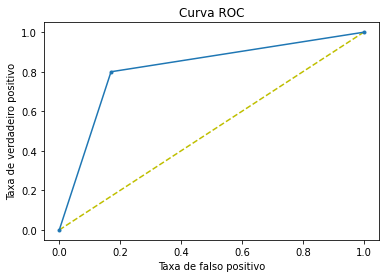

In [14]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_preds = busca.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure()
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC')
plt.show()

### GridSearch do K Neighbors

In [41]:
from sklearn.model_selection import GridSearchCV
# desativa avisos de execução
import warnings
warnings.filterwarnings("ignore")

# lista de parâmetros viáveis de ajuste buscado na técnica
parametros = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [25, 30, 35],
}

# técnica a ser ajustada
tec1 = KNeighborsClassifier()
# busca de parâmetros para um 5-Fold e métrica de pontuação 'Recall'
busca = GridSearchCV(tec1, parametros, cv=5, scoring='recall_micro')
# buscando no treinamento
start = time.time()
busca.fit(X,y)
end = time.time()
# 5 melhores resultados
pd.DataFrame(data=busca.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,0.011986,0.000074,0.388936,0.009886,ball_tree,35,3,distance,"{'algorithm': 'ball_tree', 'leaf_size': 35, 'n...",0.878845,0.874411,0.877865,0.876295,0.868446,0.875172,0.003683,1
1,0.016698,0.000134,0.091289,0.003920,auto,25,3,distance,"{'algorithm': 'auto', 'leaf_size': 25, 'n_neig...",0.878845,0.874411,0.877865,0.876295,0.868446,0.875172,0.003683,1
67,0.001944,0.000022,0.503552,0.002936,brute,35,3,distance,"{'algorithm': 'brute', 'leaf_size': 35, 'n_nei...",0.878845,0.874411,0.877865,0.876295,0.868446,0.875172,0.003683,1
19,0.012024,0.000105,0.385259,0.011906,ball_tree,25,3,distance,"{'algorithm': 'ball_tree', 'leaf_size': 25, 'n...",0.878845,0.874411,0.877865,0.876295,0.868446,0.875172,0.003683,1
25,0.012028,0.000129,0.389345,0.008093,ball_tree,30,3,distance,"{'algorithm': 'ball_tree', 'leaf_size': 30, 'n...",0.878845,0.874411,0.877865,0.876295,0.868446,0.875172,0.003683,1


In [42]:
print('Melhores parâmetros:')
print('  ',busca.best_estimator_,'\n')
print('Relatório de Classificação:')
y_pred = busca.best_estimator_.predict(X)
print(classification_report(y,y_pred),'\n')
print('Matriz de Confusão:')
print(confusion_matrix(y,y_pred))
print("Tempo de execução:", round(end - start, 5), "segundos")

Melhores parâmetros:
   KNeighborsClassifier(leaf_size=25, n_neighbors=3, weights='distance') 

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7963
           1       1.00      1.00      1.00      7963

    accuracy                           1.00     15926
   macro avg       1.00      1.00      1.00     15926
weighted avg       1.00      1.00      1.00     15926
 

Matriz de Confusão:
[[7963    0]
 [   0 7963]]
Tempo de execução: 143.79218 segundos


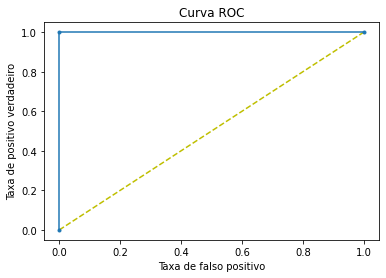

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_preds = busca.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure()
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC')
plt.show()

##  RandomizedSearchCV

### Randomized do RandomForest

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# desativa avisos de execução
import warnings
warnings.filterwarnings("ignore")

# lista de parâmetros viáveis de ajuste buscado na técnica
parametros = {
   'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10],
    'min_samples_split': [1.5, 2, 2.5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'class_weight': ['balanced', "balanced_subsample"],
}

# técnica a ser ajustada
tec2 = RandomForestClassifier(random_state=42)
# busca de parâmetros para um 5-Fold e métrica de pontuação 'Recall'
busca = RandomizedSearchCV(tec2, parametros, cv=5, scoring='recall_micro',random_state=42)
# buscando no treinamento
start = time.time()
busca.fit(X,y)
end = time.time()
# 5 melhores resultados
pd.DataFrame(data=busca.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_oob_score,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,...,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.164404,0.006658,0.034705,0.002112,False,50,2,log2,10,gini,...,True,"{'oob_score': False, 'n_estimators': 50, 'min_...",0.879473,0.879435,0.871900,0.877551,0.876295,0.876931,0.002787,1
8,11.573981,1.883580,0.124938,0.002539,False,200,2,log2,10,entropy,...,False,"{'oob_score': False, 'n_estimators': 200, 'min...",0.874765,0.874097,0.870958,0.870330,0.870330,0.872096,0.001932,2
4,2.118756,0.393199,0.034891,0.004165,True,50,2,sqrt,10,entropy,...,True,"{'oob_score': True, 'n_estimators': 50, 'min_s...",0.873195,0.867504,0.864050,0.868132,0.868760,0.868328,0.002929,3
0,0.004391,0.000138,0.000000,0.000000,True,150,1.5,log2,10,entropy,...,False,"{'oob_score': True, 'n_estimators': 150, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,0.004302,0.000144,0.000000,0.000000,True,100,2,sqrt,10,entropy,...,False,"{'oob_score': True, 'n_estimators': 100, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [31]:
print('Melhores parâmetros:')
print('  ',busca.best_estimator_,'\n')
print('Relatório de Classificação:')
y_pred = busca.best_estimator_.predict(X)
print(classification_report(y,y_pred),'\n')
print('Matriz de Confusão:')
print(confusion_matrix(y,y_pred))
print("Tempo de execução:", round(end - start, 5), "segundos")

Melhores parâmetros:
   RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', n_estimators=50, random_state=42) 

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7963
           1       0.91      0.94      0.93      7963

    accuracy                           0.93     15926
   macro avg       0.93      0.93      0.93     15926
weighted avg       0.93      0.93      0.93     15926
 

Matriz de Confusão:
[[7254  709]
 [ 466 7497]]
Tempo de execução: 77.29877 segundos


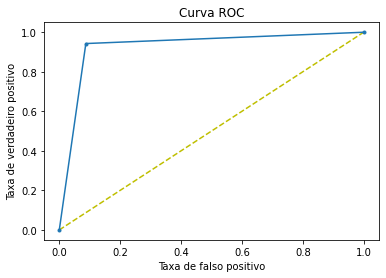

In [32]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_preds = busca.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure()
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC')
plt.show()

### Randomized do DecisionTree

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# desativa avisos de execução
import warnings
warnings.filterwarnings("ignore")

# lista de parâmetros viáveis de ajuste buscado na técnica
parametros = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [10],
    'min_samples_split': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'none'],
}

# técnica a ser ajustada
tec2 = DecisionTreeClassifier(random_state=42)
# busca de parâmetros para um 5-Fold e métrica de pontuação 'Recall'
busca = RandomizedSearchCV(tec2, parametros, cv=5, scoring='recall_micro',random_state=42)
# buscando no treinamento
start = time.time()
busca.fit(X,y)
end = time.time()
# 5 melhores resultados
pd.DataFrame(data=busca.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_max_features,param_max_depth,param_criterion,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.051889,0.002007,0.004843,0.001044,best,3,sqrt,10,gini,balanced,"{'splitter': 'best', 'min_samples_split': 3, '...",0.762712,0.779278,0.781162,0.751962,0.766719,0.768367,0.010831,1
6,0.055543,0.006073,0.004326,0.000119,best,3,log2,10,gini,balanced,"{'splitter': 'best', 'min_samples_split': 3, '...",0.762712,0.779278,0.781162,0.751962,0.766719,0.768367,0.010831,1
1,0.003297,0.000123,0.000000,0.000000,best,2,sqrt,10,log_loss,none,"{'splitter': 'best', 'min_samples_split': 2, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,0.006891,0.000189,0.000000,0.000000,best,1,log2,10,entropy,balanced,"{'splitter': 'best', 'min_samples_split': 1, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,0.007041,0.000181,0.000000,0.000000,best,1,sqrt,10,gini,balanced,"{'splitter': 'best', 'min_samples_split': 1, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [38]:
print('Melhores parâmetros:')
print('  ',busca.best_estimator_,'\n')
print('Relatório de Classificação:')
y_pred = busca.best_estimator_.predict(X)
print(classification_report(y,y_pred),'\n')
print('Matriz de Confusão:')
print(confusion_matrix(y,y_pred))
print("Tempo de execução:", round(end - start, 5), "segundos")

Melhores parâmetros:
   DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=3,
                       random_state=42) 

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      7963
           1       0.82      0.80      0.81      7963

    accuracy                           0.81     15926
   macro avg       0.81      0.81      0.81     15926
weighted avg       0.81      0.81      0.81     15926
 

Matriz de Confusão:
[[6552 1411]
 [1614 6349]]
Tempo de execução: 0.94239 segundos


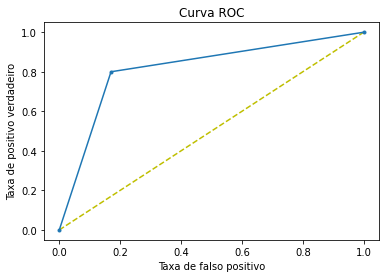

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_preds = busca.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure()
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC')
plt.show()

### Randomized do K Neighbors

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# desativa avisos de execução
import warnings
warnings.filterwarnings("ignore")

# lista de parâmetros viáveis de ajuste buscado na técnica
parametros = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [25, 30, 35],
}

# técnica a ser ajustada
tec2 = KNeighborsClassifier()
# busca de parâmetros para um 5-Fold e métrica de pontuação 'Recall'
busca = RandomizedSearchCV(tec2, parametros, cv=5, scoring='recall_micro',random_state=42)
# buscando no treinamento
start = time.time()
busca.fit(X,y)
end = time.time()
# 5 melhores resultados
pd.DataFrame(data=busca.cv_results_).sort_values(by='rank_test_score').head()



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.012288,0.000190,0.459361,0.013173,uniform,3,25,ball_tree,"{'weights': 'uniform', 'n_neighbors': 3, 'leaf...",0.856874,0.842386,0.854003,0.846154,0.840816,0.848047,0.006345,1
3,0.016717,0.000195,0.161929,0.002483,uniform,3,25,auto,"{'weights': 'uniform', 'n_neighbors': 3, 'leaf...",0.856874,0.842386,0.854003,0.846154,0.840816,0.848047,0.006345,1
8,0.016866,0.000234,0.178931,0.024614,uniform,3,35,auto,"{'weights': 'uniform', 'n_neighbors': 3, 'leaf...",0.856874,0.842386,0.854003,0.846154,0.840816,0.848047,0.006345,1
9,0.001977,0.000051,0.585169,0.006377,uniform,3,25,brute,"{'weights': 'uniform', 'n_neighbors': 3, 'leaf...",0.856874,0.842386,0.854003,0.846154,0.840816,0.848047,0.006345,1
1,0.001965,0.000069,0.853547,0.021728,uniform,5,30,brute,"{'weights': 'uniform', 'n_neighbors': 5, 'leaf...",0.815129,0.807535,0.817896,0.802512,0.800942,0.808803,0.006718,5


In [36]:
print('Melhores parâmetros:')
print('  ',busca.best_estimator_,'\n')
print('Relatório de Classificação:')
y_pred = busca.best_estimator_.predict(X)
print(classification_report(y,y_pred),'\n')
print('Matriz de Confusão:')
print(confusion_matrix(y,y_pred))
print("Tempo de execução:", round(end - start, 5), "segundos")

Melhores parâmetros:
   KNeighborsClassifier(algorithm='ball_tree', leaf_size=25, n_neighbors=3) 

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      7963
           1       0.89      0.99      0.94      7963

    accuracy                           0.94     15926
   macro avg       0.94      0.94      0.94     15926
weighted avg       0.94      0.94      0.94     15926
 

Matriz de Confusão:
[[7007  956]
 [  72 7891]]
Tempo de execução: 21.0082 segundos


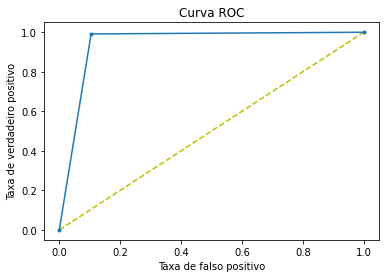

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_preds = busca.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure()
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC')
plt.show()